First 5 Rows:
                  Sales
2020-01-01  102.483571
2020-01-02  101.792249
2020-01-03  105.030692
2020-01-04  112.645841
2020-01-05  111.475074

Summary Statistics:
             Sales
count  100.000000
mean    67.974088
std     23.219991
min     38.766721
25%     50.662460
50%     58.639330
75%     79.700146
max    122.403056

Missing Values:
 Sales    0
dtype: int64


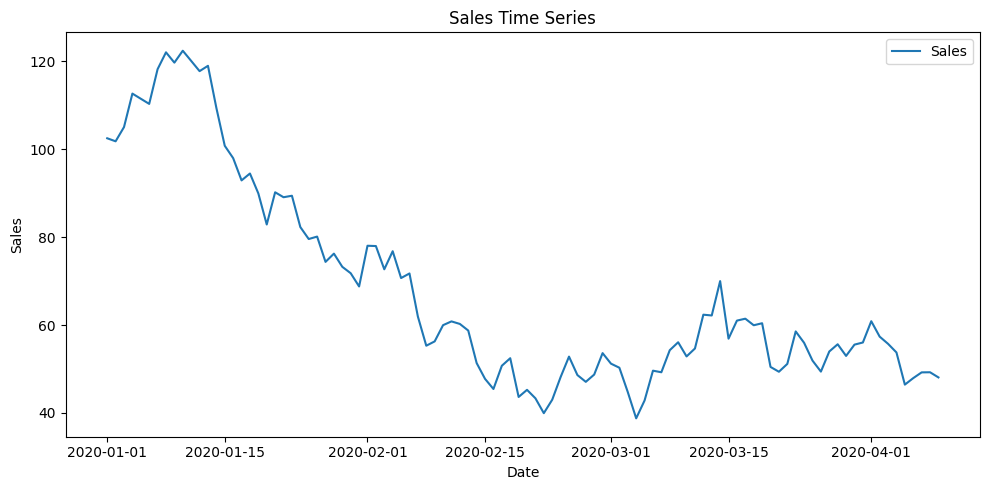

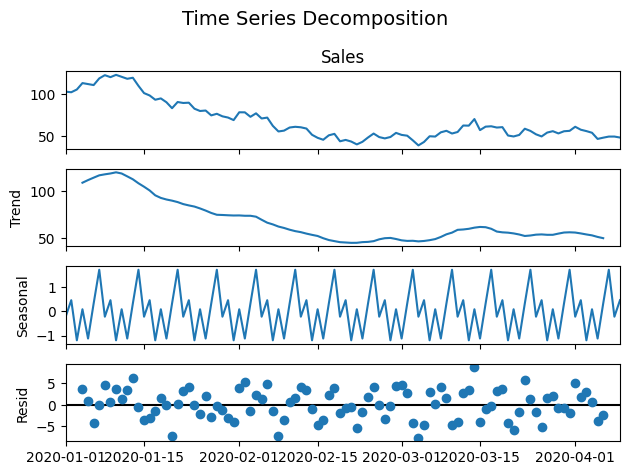

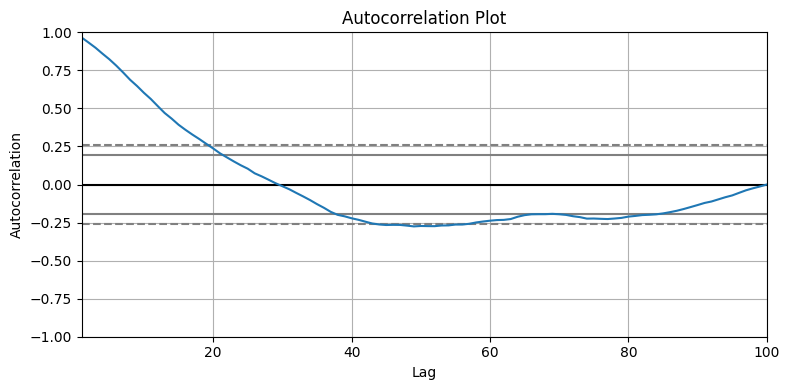

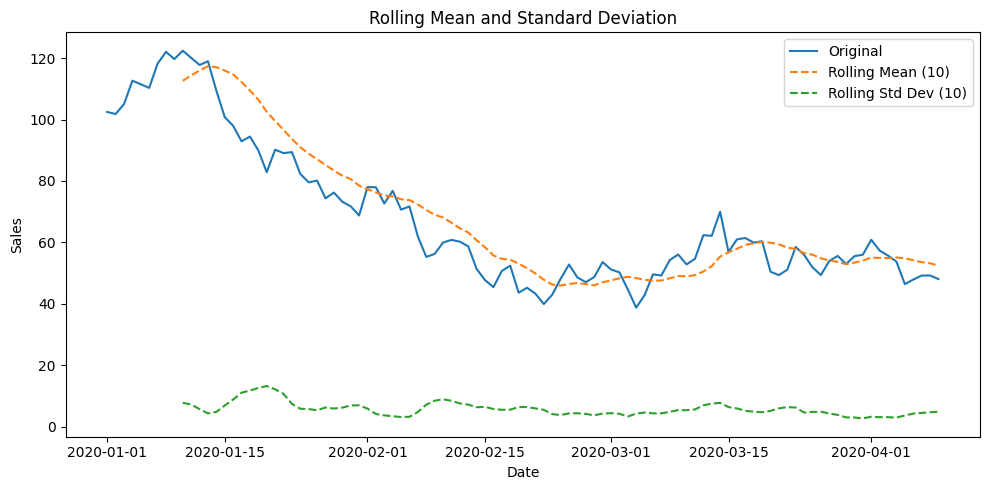


Analysis complete. Review the graphs for insights.


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot


def generate_time_series(start='2020-01-01', periods=100, freq='D', seed=42):
    """Generate sample time series data"""
    np.random.seed(seed)
    date_rng = pd.date_range(start=start, periods=periods, freq=freq)
    sales = 100 + np.random.normal(loc=0, scale=5, size=periods).cumsum()
    return pd.DataFrame({'Sales': sales}, index=date_rng)


def explore_data(df):
    """Step 2: Explore and describe data"""
    print("First 5 Rows:\n", df.head())
    print("\nSummary Statistics:\n", df.describe())
    print("\nMissing Values:\n", df.isnull().sum())


def plot_time_series(df):
    """Step 2: Visualize time series"""
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Sales'], label='Sales')
    plt.title('Sales Time Series')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.tight_layout()
    plt.show()


def decompose_series(df, model='additive', period=7):
    """Step 3: Decompose the time series"""
    result = seasonal_decompose(df['Sales'], model=model, period=period)
    return result


def plot_decomposition(result):
    """Step 4: Plot decomposition"""
    result.plot()
    plt.suptitle('Time Series Decomposition', fontsize=14)
    plt.tight_layout()
    plt.show()


def plot_autocorrelation(df):
    """Step 5: Autocorrelation"""
    plt.figure(figsize=(8, 4))
    autocorrelation_plot(df['Sales'])
    plt.title('Autocorrelation Plot')
    plt.tight_layout()
    plt.show()


def plot_rolling_statistics(df, window=10):
    """Step 6: Rolling statistics"""
    mean = df['Sales'].rolling(window).mean()
    std = df['Sales'].rolling(window).std()

    plt.figure(figsize=(10, 5))
    plt.plot(df['Sales'], label='Original')
    plt.plot(mean, label=f'Rolling Mean ({window})', linestyle='--')
    plt.plot(std, label=f'Rolling Std Dev ({window})', linestyle='--')
    plt.title('Rolling Mean and Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.tight_layout()
    plt.show()


def main():
    # Step 1: Data Preparation
    df = generate_time_series()

    # Step 2: Data Exploration & Visualization
    explore_data(df)
    plot_time_series(df)

    # Step 3 & 4: Decomposition
    result = decompose_series(df)
    plot_decomposition(result)

    # Step 5: Autocorrelation
    plot_autocorrelation(df)

    # Step 6: Rolling Stats
    plot_rolling_statistics(df)

    print("\nAnalysis complete. Review the graphs for insights.")


# Run the program
if __name__ == "__main__":
    main()
